<h1>Implémentation en Python

In [1]:
#Dépendances
from graphviz import Graph

<h3> Matrice d'adjacence

In [2]:
class Graphe:    
    def __init__(self,n):
        ''' Le constructeur de la classe dont les attributs d'instance sont n et adj
            Exemple: G=Graphe(5) instancie un graphe d'ordre 5 de sommets 0,1,2,3,4 sans aucune arête'''
        self.n = n 
        self.adj = [[False]*n for _ in range(n)] # liste d'adjacence
        
    def ajoute_arete(self,i,j):
        '''Ajoute une arête entre i et j et entre j et i'''
        self.adj[i][j] = True
        self.adj[j][i] = True
        
    def arete(self,i,j):
        '''Renvoie True s'il y a une arête entre i et j et False sinon'''
        return self.adj[i][j]
    
    def voisins(self,i):
        '''Renvoie la liste des voisins de i'''
        liste_arete = []
        for k in range(len(self.adj[i])) :
            if self.adj[i][k] :
                liste_arete.append(k)
        return liste_arete
    
    def degre(self,i):
        '''Renvoie le degré du sommet i''' #Nombre de liens
        degre = 0
        for k in range(len(self.adj[i])) :
            if self.adj[i][k] :
                degre += 1
        return degre
        
    
    def nb_aretes(self):
        '''Renvoie le nb d'arêtes du graphe'''
        nb_aretes = 0
        for k in range(self.n) :
            for l in range(k, len(self.adj[k])) :
                if self.adj[k][l] :
                    nb_aretes += 1
        return nb_aretes

    
    def affiche(self): 
        "Affichage du graphe en utilisant le module graphviz"
        dot = Graph('G')
        for i in range(self.n):
            for j in range(self.n): 
                # Condition pour éviter les doubles arêtes
                if self.adj[i][j] and '{} -- {}'.format(j,i) not in dot.source:
                    # dot.edge n'accepte que le type str
                    dot.edge(str(i),str(j))        
        return dot

<h3> Dictionnaire non orienté

In [3]:
class Graphe:    
    def __init__(self):
        ''' Le constructeur de la classe dont le seul attribut d'instance est le dictionnaire d'adjacence d
            Exemple: G=Graphe() instancie un graphe vide'''
        self.d = dict() # dictionnaire d'adjacence
        
    def ajoute_sommet(self,s):
        '''Ajoute le sommet s au graphe si celui-ci est un nouveau sommet''' 
        self.d[s] = []
    
    def ajoute_arete(self,s,t):
        '''Ajoute si nécessaire les sommets s et t puis crée si elle n'existait pas une arête entre s et t'''
         # S -> T
        if s in self.d:
            self.d[s].append(t)
        else :
            self.ajoute_sommet(s)
            self.d[s].append(t)

        # T -> S
        if t in self.d :
            self.d[t].append(s)
        else :
            self.ajoute_sommet(t)
            self.d[t].append(s)
        
    def arete(self,s,t):
        '''Renvoie True s'il y a une arête entre s et t et False sinon'''
        if t in self.d[s] or s in self.d[t] :
            return True
        else :
            return False
    
    def sommets(self):
        '''Renvoie la liste de tous les sommets du graphe'''
        liste_sommets = []
        for k in self.d :
            liste_sommets.append(k)
        return liste_sommets
    
    def voisins(self,s):
        '''Renvoie la liste des voisins de s'''
        return self.d[s]
    
    def degre(self,s):
        '''Renvoie le degré du sommet s'''
        return len(self.d[s])
    
    def nb_aretes(self):
        '''Renvoie le nb d'arêtes du graphe'''
        nb_aretes = 0
        for k in self.sommets() :
            for _ in self.d[k] :
                nb_aretes += 1
        return nb_aretes // 2
    
    def affiche(self): 
        "Affichage du graphe en utilisant le module graphviz"
        dot = Graph('G')
        for s in self.sommets():
            for t in self.sommets(): 
                # Condition pour éviter les doubles arêtes
                if (t in self.d[s]) and '{} -- {}'.format(t,s) not in dot.source:
                    dot.edge(s,t)
        return dot

<h3>Dictionnaire orienté

In [4]:
class DiGraphe:    
    def __init__(self):
        ''' Le constructeur de la classe dont le seul attribut d'instance est le dictionnaire d'adjacence d
            Exemple: G=DiGraphe() instancie un graphe orienté vide'''
        self.d = dict() # dictionnaire d'adjacence
        
    def ajoute_sommet(self,s):
        '''Ajoute le sommet s au graphe si celui-ci est un nouveau sommet''' 
        self.d[s] = []
    
    def ajoute_arc(self,s,t):
        '''Ajoute si nécessaire les sommets s et t puis crée si il n'existait pas un arc de s vers t'''
        if s in self.d and t in self.d :
            self.d[s].append(t)

        elif s in self.d :
            self.ajoute_sommet(t)
            self.d[s].append(t)

        elif t in self.d :
            self.ajoute_sommet(s)
            self.d[s].append(t)
        
        else :
            self.ajoute_sommet(s)
            self.ajoute_sommet(t)
            self.d[s].append(t)

    def arc(self,s,t):
        '''Renvoie True s'il y a un arc de s vers t, et False sinon'''
        return (t in self.d[s])
    
    def sommets(self):
        '''Renvoie la liste de tous les sommets du graphe'''
        liste_sommets = []
        for k in self.d :
            liste_sommets.append(k)
        return liste_sommets
    
    def successeurs(self,s):
        '''Renvoie la liste des successeurs de s'''
        liste_successeurs = []
        for k in self.d[s] :
            liste_successeurs.append(k)
        return liste_successeurs
    
    def degreSortant(self,s):
        '''Renvoie le nb d'arcs sortant de s'''
        degre_sortant = 0
        for _ in self.d[s] :
            degre_sortant += 1
        return degre_sortant
    
    def degreEntrant(self,s):
        '''Renvoie le nb d'arcs entrant dans s'''
        degre_entrant = 0
        for k in self.sommets() :
            if self.arc(k, s) :
                degre_entrant += 1
        return degre_entrant
    
    def affiche(self): 
        "Affichage du graphe en utilisant le module graphviz"
        dot = Digraph('G')
        for s in self.sommets():
            for t in self.sommets():
                if t in self.d[s]:
                    dot.edge(s,t)        
        return dot

<h3>File

In [5]:
class File :
    
    '''classe File création d’une instance File avec une liste'''

    def __init__(self):
        '''Initialisation d’une pile vide'''
        self.f = []
        
    def vide(self):
        '''teste si la pile est vide'''
        return self.f == []

    def defiler(self):
        '''défile'''
        assert not self.vide(), "file vide"
        return self.f.pop(0)

    def enfiler(self,x):
        '''enfile'''
        self.f.append(x)

    def affiche(self) :
        return self.f

    def taille(self) :
        return len(self.f)

    def sommet(self) :
        assert not self.vide(), "file vide"
        return self.f[0]

<h3>Pile

In [6]:
class Pile :
        
    '''classe Pile création d’une instance Pile avec une liste'''

    def __init__(self):
        '''Initialisation d’une pile vide'''
        self.L=[]
        
    def vide(self):
        '''teste si la pile est vide'''
        return self.L==[]

    def depiler(self):
        '''dépile'''
        assert not self.vide(),"Pile vide"
        return self.L.pop()

    def empiler(self,x):
        '''empile'''
        self.L.append(x)

    #####################
    def sommet(self):
        return self.L[-1]

    def taille(self):
        return len(self.L)

    def affiche(self) :
        return self.L

<h3>10.6

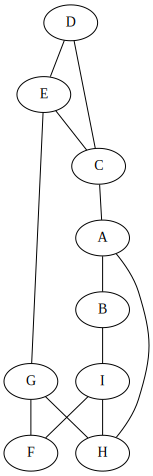

In [7]:
# 1

g1 = Graphe()
g1.ajoute_arete("D", "E")
g1.ajoute_arete("D", "C")
g1.ajoute_arete("C", "A")
g1.ajoute_arete("C", "E")
g1.ajoute_arete("E", "G")
g1.ajoute_arete("A", "B")
g1.ajoute_arete("B", "I")

g1.ajoute_arete("I", "H")
g1.ajoute_arete("I", "F")
g1.ajoute_arete("A", "H")
g1.ajoute_arete("G", "F")
g1.ajoute_arete("G", "H")

g1.affiche()

In [8]:
#2

def bfs(graphe : Graphe, sommet_depart : str) -> list:

    g2 = graphe
    s = sommet_depart
    f = File()
    liste_sommets_parcourus = []

    couleur = dict()
    for i in g2.sommets() :
        couleur[i] = "blanc"

    couleur[s]= "noir"
    f.enfiler(s)
    liste_sommets_parcourus.append(s)
    while not f.vide() :
        u = f.defiler()
        for v in g2.voisins(u) :
            if couleur[v] != "noir" :
                couleur[v] = "noir"
                f.enfiler(v)
                liste_sommets_parcourus.append(v)
    return liste_sommets_parcourus

In [9]:
bfs(g1, "A")

['A', 'C', 'B', 'H', 'D', 'E', 'I', 'G', 'F']

In [23]:
# 3



def bps(graphe : Graphe, sommet_depart : str) -> list:

    s = sommet_depart
    g3 = graphe
    p = Pile()
    l = [] # Liste des sommets parcourus

    couleur = dict()
    for i in g3.sommets() :
        couleur[i] = "blanc"

    couleur[s] = "noir"
    p.empiler(s)
    l.append(s)
    
    while not p.vide() :
        u = p.depiler()
        for v in g3.voisins(u) :
            if couleur[v] != "noir" :
                couleur[v] = "noir"
                p.empiler(v)
                l.append(v)
    return l 

In [24]:
bps(g1, "A")

['A', 'C', 'B', 'H', 'I', 'G', 'E', 'F', 'D']

In [21]:
# 4

couleur = dict()
for i in g1.sommets() :
    couleur[i] = "blanc"
liste = []

def recursif_bps(graphe : Graphe, sommet : str, couleur : dict, l :list) -> list :

    g4 = graphe
    u = sommet

    couleur[u] = "noir"
    l.append(u)
    for v in g4.voisins(u) :
        if couleur[v] != "noir" :
            recursif_bps(g4, v, couleur, l)
    return l

In [22]:
recursif_bps(g1, "A", couleur, liste)

['A', 'C', 'D', 'E', 'G', 'F', 'I', 'B', 'H']